In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('PlayTennis.csv')

In [ ]:
data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
le = preprocessing.LabelEncoder()
data_df = pd.DataFrame(data)
data_df_encoded = data_df.apply(le.fit_transform)

In [ ]:
X= data_df_encoded.drop(['play'],axis=1)
y= data_df_encoded['play']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.5,random_state=0)

In [ ]:
model = GaussianNB()
nbtrain = model.fit(X_train, y_train)
y_pred = nbtrain.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.5714285714285714


Confusion Matrix
[[0 1]
 [2 4]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


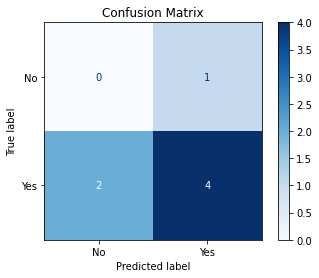

In [ ]:
disp = plot_confusion_matrix(nbtrain, X_test, y_test,display_labels=['No','Yes'],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()